In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
from enum import IntEnum
from dataclasses import dataclass
from enum import Enum
import copy


In [195]:
df = pd.read_parquet('../datasets/cleaned/polyvore_v1.parquet 3')

In [229]:
@dataclass
class WearType(Enum):
    accessoire = 1.0
    innerWear = 2.0
    outerWear = 3.0
    bottomWear = 4.0
    shoes = 5.0

In [199]:
df["Ratio"] =  df["outfitLikes"] / df["outfitViews"]

In [200]:
df["Ratio"].describe()

count    30370.000000
mean         0.281321
std          1.311706
min          0.000662
25%          0.090909
50%          0.189711
75%          0.314286
max         54.750000
Name: Ratio, dtype: float64

In [230]:
df["Ratio"].skew()

28.917114195245286

In [231]:
df["Ratio_Log"] =  np.log10(df["outfitLikes"] / df["outfitViews"])
df["Ratio_Log"].describe()

count    30370.000000
mean        -0.795442
std          0.428661
min         -3.178977
25%         -1.041393
50%         -0.721908
75%         -0.502675
max          1.738384
Name: Ratio_Log, dtype: float64

In [201]:
# I want to create a new dataframe with the unique indexes of the setID. So every setID should only appear once.

df_copy = copy.deepcopy(df)
setIDs = df_copy["set_id"].unique()

In [202]:
def add_item_to_setID(setID, item, wearType):
    df_setID.loc[setID, f"{wearType} ImagePath"] = item["imagePath"]
    df_setID.loc[setID, f"{wearType} ClothingItemName"] = item["clothingItemName"]
    df_setID.loc[setID, f"{wearType} wearType"] = item["wearType"]

In [203]:
df_setID = pd.DataFrame()
for set_id in setIDs:
    #Initialisatio
    items = df[df["set_id"] == set_id]
    df_items = pd.DataFrame(items)
    added_accessoire = False
    
    #Adding the basic information about the SetID
    df_setID.loc[set_id, "OutfitName"] = df[df["set_id"] == set_id]["outfitName"].values[0]
    df_setID.loc[set_id, "outfitDesc"] = df[df["set_id"] == set_id]["outfitDesc"].values[0]
    df_setID.loc[set_id, "outfitViews"] = df[df["set_id"] == set_id]["outfitViews"].values[0]
    df_setID.loc[set_id, "outfitLikes"] = df[df["set_id"] == set_id]["outfitLikes"].values[0]
    df_setID.loc[set_id, "Ratio"] = df[df["set_id"] == set_id]["Ratio"].values[0]
    
    #Adding the items to the setID
    for index, item in df_items.iterrows():
        if (item["wearType"] == 1.0) and added_accessoire:
            print("Sorry, es wurde bereits ein Accessoirces hinzugefügt")
            continue
        if (item["wearType"] == 5.0):
            add_item_to_setID(set_id, item, "Shoes")
        elif (item["wearType"] == 4.0):
            add_item_to_setID(set_id, item, "Bottomwear")
        elif (item["wearType"] == 2.0):
            add_item_to_setID(set_id, item, "Innerwear")   
        elif (item["wearType"] == 3.0):
            add_item_to_setID(set_id, item, "Outerwear")
        elif (item["wearType"] == 1.0):
            add_item_to_setID(set_id, item, "Accessoire")
            added_accessoire = True
        else:
            print(item["wearType"])
            raise ValueError("WearType not found")

2.0
4.0
2.0
4.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
4.0
5.0
2.0
4.0
5.0
1.0
3.0
2.0
4.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
4.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
5.0
2.0
4.0
1.0
2.0
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
3.0
4.0
2.0
2.0
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
3.0
4.0
1.0
2.0
4.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
3.0
4.0
5.0
1.0
2.0
4.0
5.0
1.0
2.0
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
4.0
5.0
1.0
1.0
Sorry, es wurde bereits ein Accessoirces hinzugefügt
2.0
4.0
5.0
1.0
2.0
4.0


# Data Quality Assessment

In [205]:
df[df["wearType"].isna() == True]

,outfitName,outfitViews,wearType,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId,imagePath,Ratio


### Drop the Rows the a Ratio over 1.0. This is not possible

In [220]:
df_setID = df_setID.drop(df_setID[df_setID["Ratio"] > 1.0].index)

<Axes: xlabel='Ratio', ylabel='Count'>

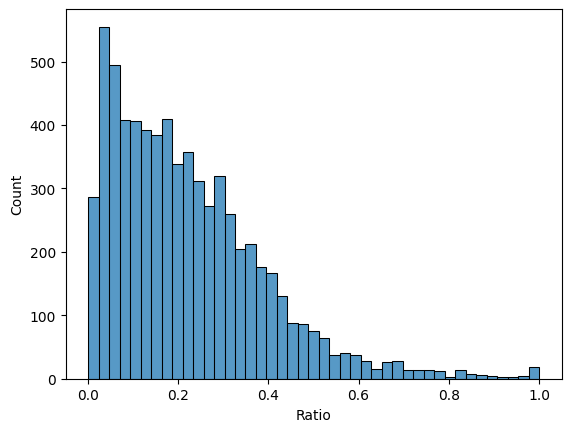

In [224]:
sns.histplot(df_setID["Ratio"])

<Axes: xlabel='Ratio'>

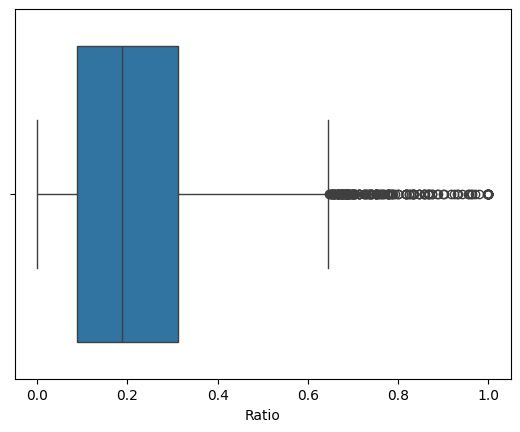

In [225]:
sns.boxplot(x=df_setID["Ratio"])


In [243]:
df_setID["Ratio_Log"] =  abs(np.log(df_setID["Ratio"]))
df_setID["Ratio_Log10"] =  abs(np.log10(df_setID["Ratio"]))
print(df_setID["Ratio_Log"].skew())
print(df_setID["Ratio_Log10"].skew())

0.9045243665188233
0.9045243665188228


In [246]:
#Normalize this from 0 to 1 --> df_setID["Ratio_Log"] 
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()
df_setID["Ratio_Log_Normalized"] = scaler.fit_transform(df_setID[["Ratio_Log"]])

<Axes: xlabel='Ratio_Log_Normalized', ylabel='Count'>

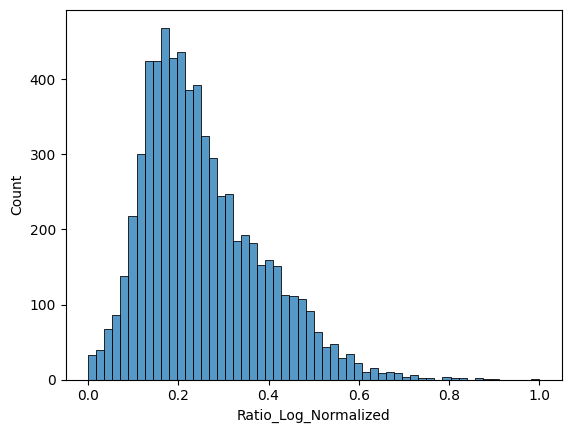

In [247]:
sns.histplot(df_setID["Ratio_Log_Normalized"])

# Add the three most dominant colors to the dataframe